# PCA : Face Recognition



In this challenge, we will use PCA in combination with a dataset of multiple black & white image**s**

This time then:
- each image is an observation (sample)
- each pixel's luminosity level is a feature (lots of features!!)

We will use PCA to compress the picture by reducing the number of feature used to describe it.

## Load dataset

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a **lower-dimensional projection** of the data that preserves the maximal data variance.

We can then use those new representations as features to feed any model we want. It can be very useful since you often have lots of features, and you want to transform and keep a packed number of features that are the most representative of what you want to model.

__Lets load a face image dataset and apply PCA.__

In [46]:
# Load data
import pandas as pd 
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

You have access to
- `faces.images` which are the matrix of __50 x 37 pixels__ you can plot 
- `faces.data` for the the flattened version in  of size __1850 x 1__ (because 50 x 37 = 1850). 
- `faces.target` which is annotation of every face to the corresponding person (as a number index)

In [87]:
faces.target.shape

(1288,)

In [94]:
pd.DataFrame(faces.target).value_counts()

3    530
1    236
6    144
2    121
4    109
0     77
5     71
dtype: int64

In [4]:
# 1288 images
faces.images.shape

(1288, 50, 37)

In [5]:
# 1288 images flattened, equivalent to to faces.images.reshape(1288,1850)
faces.data.shape

(1288, 1850)

In [13]:
faces

{'data': array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
          86.666664],
        [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
         133.66667 ],
        [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
         183.      ],
        ...,
        [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
          44.666668],
        [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
         166.33333 ],
        [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
          61.      ]], dtype=float32),
 'images': array([[[254.      , 254.      , 251.66667 , ...,  65.333336,
           50.666668,  40.333332],
         [253.33333 , 251.33333 , 247.33333 , ...,  66.666664,
           52.      ,  42.666668],
         [240.66667 , 231.66667 , 211.66667 , ...,  62.      ,
           49.      ,  42.      ],
         ...,
         [ 74.333336,  54.      ,  31.666666, ...,  97.666664,
     

In [12]:
faces.data
#dans mon dictionnaire j'ai un dataframe qui s'appelle data

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

In [11]:
faces['data']

array([[254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
         86.666664],
       [ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ],
       [ 89.333336, 104.      , 126.      , ..., 175.33333 , 183.33333 ,
        183.      ],
       ...,
       [ 86.      ,  80.333336,  74.666664, ...,  44.      ,  49.666668,
         44.666668],
       [ 50.333332,  65.666664,  88.      , ..., 197.      , 179.33333 ,
        166.33333 ],
       [ 30.      ,  27.      ,  32.666668, ...,  35.      ,  35.333332,
         61.      ]], dtype=float32)

In [6]:
faces.target

array([5, 6, 3, ..., 5, 3, 5])

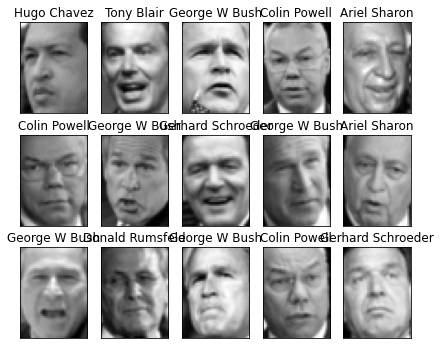

In [7]:
# Let’s visualize some faces.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

## Compress images with PCA

In this scikit dataset we have 50 × 37 pixel images (1850 dimensions!). Often, so many dimensions is a lot to train algorithms we studied in the previous exercises (for example SVM). 

That's why we use PCA to reduce these features to a more manageable size, while maintaining most of the information of the dataset.

__👉 Apply PCA to the dataset (both fit and transform), to reduce dimensions to 150, by setting `n_components=150`__. Put your transformation into a variable named `data_projected`

In [15]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
pca = PCA(n_components=150)
data_projected = pca.fit_transform(faces['data'])
data_projected

array([[   92.421394 ,    93.40681  ,   225.70383  , ...,    44.562103 ,
           57.319542 ,   -29.08454  ],
       [  646.10315  ,  -496.72903  ,   290.80954  , ...,     4.9083757,
          -23.061821 ,    12.061969 ],
       [ -488.29584  ,  -194.56212  ,  -374.94574  , ...,   -35.788857 ,
          -37.638016 ,    25.038136 ],
       ...,
       [ 1221.9855   ,   244.1128   ,  -111.04751  , ...,   -55.620834 ,
           44.320198 ,    -8.313362 ],
       [-1234.8043   ,  -407.62952  ,   330.6361   , ...,     8.741535 ,
          -25.473158 ,     8.582735 ],
       [  382.34573  ,   -98.23669  ,   290.00754  , ...,     3.108625 ,
          -33.744057 ,     6.26436  ]], dtype=float32)

The face dataset was projected onto only the first 150 principal components! Again, what we call components are directions of most variance of the dataset. 

It means that now, we don't need 1850 pixels anymore to describe each images but just 150 values. A gain by factor 12.

__How is that possible?__

- The pca has found to be the most representative directions of what distinguishes faces between each other with just 150 values for every image. 

- They are the directions of most variance. 

- You can access them in `pca.components_`

👉  Look at the first component of this array of components, and its shape

In [124]:
pca.components_

array([[-8.7770922e-03, -9.3219876e-03, -1.0703985e-02, ...,
        -1.2502352e-02, -1.1178405e-02, -1.0232723e-02],
       [ 2.1796409e-02,  1.9876087e-02,  2.1215448e-02, ...,
        -4.6622727e-02, -4.5771729e-02, -4.4418432e-02],
       [ 2.4928359e-02,  2.3176823e-02,  2.2085350e-02, ...,
         5.6272484e-02,  4.9405511e-02,  4.5221671e-02],
       ...,
       [-2.8138550e-02, -1.1944102e-02,  2.4812650e-02, ...,
         5.2570507e-02,  2.4519099e-02,  3.9021741e-03],
       [-7.4342075e-05,  7.1322089e-03,  6.6940100e-03, ...,
        -5.4653469e-02, -2.6361879e-02,  6.2887751e-02],
       [-1.9014966e-02, -7.8041074e-03, -3.7269683e-03, ...,
         1.4869580e-02,  4.4224594e-02,  3.2550085e-02]], dtype=float32)

In [18]:
# YOUR CODE HERE
# prendre les 150 features 
pca.components_[0].shape
#150 vecteurs, mes images sont de dimension 1850


(1850,)

As you can see, it's a vector of 1850 values. We have now 150 components of 1850 values each.

One face is now described as a combination (sum) of those components.

Let's reconstruct one image from its reduced representation to see how it works.

👉 Use `inverse_transform` on your `data_projected` to reconstruct a `data_reconstructed` dataset

In [28]:
# YOUR CODE HERE
data_reconstructed = pca.inverse_transform(data_projected) 


(1288, 1850)

👉 Plot the 13th picture (Gearge W Bush) of the reconstructed dataset, and compare it with the original one. 

<details>
    <summary>💡Hint</summary>

You'll have to reshape the flattened data into an "image" of dimension 2
</details>

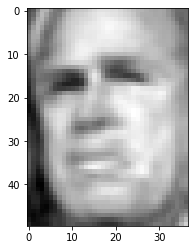

In [35]:
# YOUR CODE HERE
#on accède à la 13eme valeurs de ma liste qui correspond à bush
plt.imshow(data_reconstructed[12].reshape(50,37),cmap=plt.cm.gray)

### 🧪 Test your code

In [36]:
from nbresult import ChallengeResult

result = ChallengeResult('projection', shape=data_projected.shape)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/06-Unsupervised-Learning/02-Face-Recognition
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_projection.py::TestProjection::test_shape PASSED              [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/projection.pickle

git commit -m 'Completed projection step'

git push origin master


👉 (Optional) study the code below which reconstruct the image step by step without `inverse_transform`. 

Instead, we do manually the multiplication $X_{reconstructed} = X_{projected} W$ with $W$ being the `pca.components_` matrix of 150 PC in rows expressed as linear combination of 1850 pixels in columns


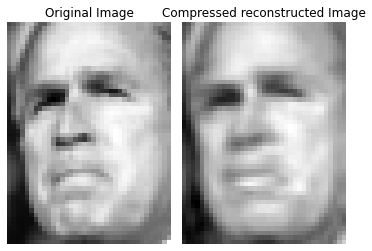

In [20]:
num_dimensions = 150

# We do our reconstruction over the 13th image
image_original = faces.images[12];
image_compressed = data_projected[12];

# we start the reconstruction from the mean over all images (feel free to print mean face to check!)
image_reconstructed = pca.mean_.copy(); 

# Then, reconstruct the image by doing the sum of every 150 entry of its compressed representation,
# weighted by the corresponding principal components
for i in range(num_dimensions):
    image_reconstructed += pca.components_[i] * image_compressed[i]
    
# Plot the original and the compressed image.
fig, ax = plt.subplots(1, 2, figsize = (5,5))
ax[0].imshow(image_original, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(image_reconstructed.reshape(faces.images[0].shape), cmap=plt.cm.gray)
ax[1].set_title('Compressed reconstructed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

## Investigate your Principal Components

👉 Image-plot the "mean" face of the dataset

<details>
    <summary>💡Hint</summary>


You can use `pca.mean_` or `faces.data.mean(axis=0)`
</details>


In [38]:
faces.data.mean(axis=0)

array([ 92.70909,  97.7074 , 107.88405, ..., 120.61822, 113.31209,
       105.59517], dtype=float32)

In [37]:
# YOUR CODE HERE
pca = PCA(n_components=150)
pca.mean_

array([ 92.70909,  97.7074 , 107.88405, ..., 120.61822, 113.31209,
       105.59517], dtype=float32)

👉 Access your first PC. What's its shape? Print it as pd.Series or NDarray. What does each values represents?

In [50]:
# YOUR CODE HERE
pd.DataFrame(pca.components_[0]).shape

(1850, 1)

Each PC is a flatten "image" of 1850 pixels

- Your first PC are the most important "directions" on of your 1850-dimension dataset.

- They are the most important "linear combination of your 1850 pixels".

- The ones which preserves the most "variance" when your dataset of pictures is projected onto it.

- The first few PCs are the regions of the 2D pixel grid that bear the most differences between your 1288 images

👉 Image-Plot the **5 first** principal components, as well as the **last** one.
Do you see more intuitively what PC are? 

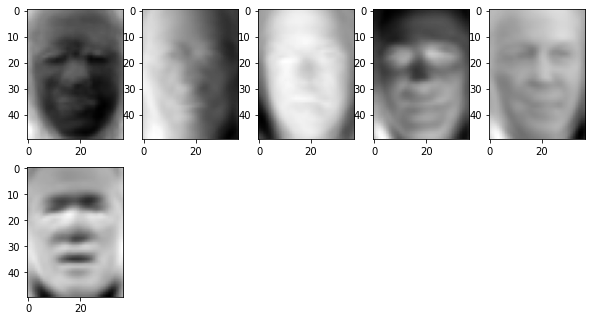

In [78]:
# YOUR CODE HERE
fig = plt.figure(figsize=(10,14))
for i in range(0,6):
    plt.subplot(5, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(50,37),cmap=plt.cm.gray)

Every image can be represented by the "mean face" plus a linear combination of the 150 "PC faces".

## How to Choose the Number of Components?

In practice, it is very important to find how many components are needed to describe the data without losing too much information. This can be determined visually by plotting the cumulative sum of `explained_variance_ratio_` as a function of the number of components.
 
👉 Plot it below for the first 150 components

In [70]:
# YOUR CODE HERE
explained_variance_ratio_ = data_projected.std()**2 / ((data_projected.std()**2).cumsum())
explained_variance_ratio_

array([1.])

In [71]:
pca.explained_variance_ratio_

array([0.18831764, 0.15066996, 0.07269001, 0.06034761, 0.05140398,
       0.03032947, 0.02475532, 0.02107429, 0.02037348, 0.01916663,
       0.01615011, 0.01504797, 0.01231834, 0.01079173, 0.01052914,
       0.00978116, 0.00921124, 0.00878475, 0.00824299, 0.00713981,
       0.00684672, 0.00655544, 0.0061341 , 0.00589635, 0.00542287,
       0.00529274, 0.00505279, 0.0047892 , 0.00458215, 0.00423686,
       0.00388917, 0.00371457, 0.00360875, 0.00349722, 0.00340279,
       0.00321915, 0.00317491, 0.00301395, 0.00291113, 0.00279419,
       0.0027767 , 0.00272101, 0.00259859, 0.00255515, 0.00238043,
       0.00235594, 0.00233285, 0.00224394, 0.00219193, 0.00216221,
       0.00210703, 0.00204842, 0.00198605, 0.00193043, 0.00192493,
       0.00188259, 0.00178824, 0.00176901, 0.00172966, 0.00171373,
       0.00163413, 0.00159547, 0.00156317, 0.00152295, 0.00150197,
       0.0014588 , 0.00143406, 0.00141541, 0.00139657, 0.00139132,
       0.00133426, 0.00130171, 0.00129649, 0.00126014, 0.00123

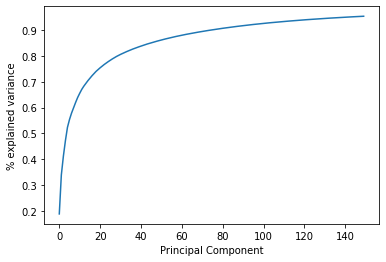

In [76]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

This curve quantifies how much of the total variance is contained within the first components. For example:
- The first 20 components contain more than 75% of the variance,
- while we need about only 70 components to describe 90% of the variance!

**❓ What is the minimal number of components you need to keep to get _at least_ 80% of the variance?  Assign the value to a variable called `minimal_pc_count`**  

In [83]:
# YOUR CODE HERE
minimal_pc_count = 30

### 🧪 Test your code

In [84]:
from nbresult import ChallengeResult

result = ChallengeResult('components', min_pc = minimal_pc_count)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/06-Unsupervised-Learning/02-Face-Recognition
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_components.py::TestComponents::test_minimal_pc PASSED         [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/components.pickle

git commit -m 'Completed components step'

git push origin master


## Classify images (PCA as feature engineering)

You have this dataset of faces and you want to build a face recognition engine to predict `faces.target` which is annotation of every face to the corresponding person (as a number index)

You can now use this low-dimensional new transformation you just created, that is still representative of the faces to train your supervised algorithm!

### Train test split the face dataset

👉 Use the train test split function from scikit to separate __the original faces dataset__ into training and testing set, `X_train`, `X_test`, `y_train`, `y_test`

In [98]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
#mon X est le face.data et mon Y le face.target
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.33, random_state=42) 
from sklearn.decomposition import PCA

pca = PCA(n_components=150).fit(X_train)
X_train_transformed = pca.transform(X_train)

### Transform your training set to reduce the number of dimensions / features

👉 Fit a PCA __over the training data only__ and transform your training data into the reduced dimension (150 features for example).

In [125]:
# YOUR CODE HERE
pca.fit(X_train)
X_train_transform = pca.transform(X_train)

👉 Using this same PCA (only trained on the training set) transform your testing set as well

In [101]:
# YOUR CODE HERE
pca.transform(X_test)

array([[ -908.71533  , -1197.8276   ,  -378.7068   , ...,   -29.884224 ,
          -26.652332 ,     6.3210897],
       [ -610.72974  ,   926.77545  ,  -298.43866  , ...,    40.68524  ,
           43.4546   ,     3.6237679],
       [ -587.3799   ,  -217.27228  ,  -521.0599   , ...,    47.34642  ,
            8.36241  ,    14.13628  ],
       ...,
       [-1165.6803   ,   799.58856  ,  -520.89355  , ...,   -32.738617 ,
          -21.808834 ,    -9.678864 ],
       [  762.0667   ,     6.3836746,  -347.83194  , ...,     6.4960256,
          -17.89993  ,   -56.63598  ],
       [ -277.29532  ,  -171.01233  ,  -118.01958  , ...,   -13.7303295,
           26.24778  ,   -16.044825 ]], dtype=float32)

### Cross validate your choice of best hyperparameters

👉 Call a cross validated grid search for an SVM, where you loop over all combinations of

- kernels
- "C between 10 and 10000
- "gamma" between 0.0001 and 0.1

👉 Use `n_jobs=-1` to make use of all your core CPUs

👉 Use `f1_weighted` as the performance metric

<details>
    <summary>🔎 Hint </summary>
    Remember the task at hand calls for classification, have a look at the <a src=https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC>Support Vector Classification </a> class.
</details>

In [130]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
model = SVC()
param_grid = {'kernel':['linear', 'rbf'],'C':[10, 200, 500, 10000,10000],"gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

#Instanciate Grid Search
search_svm_rbf = GridSearchCV(SVC(class_weight="balanced"), param_grid,scoring = 'f1_weighted',cv = 5,n_jobs=-1) # paralellize computation
             
search_svm_rbf.fit(X_train, y_train);
svm_rbf_best = search_svm_rbf.best_estimator_
svm_rbf_best 

SVC(C=10, class_weight='balanced', gamma=0.0001, kernel='linear')

👉 Train that cross validation grid search over our newly transformed training set. (Long computation)

In [114]:
# YOUR CODE HERE


👉 Print the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) of your best model over the testing set 

In [116]:
# YOUR CODE HERE
from sklearn.metrics import classification_report
y_pred = search_svm_rbf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68        21
           1       0.84      0.89      0.86        79
           2       0.69      0.76      0.72        38
           3       0.90      0.89      0.90       179
           4       0.81      0.79      0.80        33
           5       0.83      0.65      0.73        23
           6       0.82      0.75      0.78        53

    accuracy                           0.83       426
   macro avg       0.79      0.78      0.78       426
weighted avg       0.84      0.83      0.83       426



👉 Try to improve this score with the best choice of PCA components

<details>
    <summary>💡 Hint</summary>
    
- Try to pipeline your preprocessing (PCA) and your modelling (SVC)
- A pipeline is an instance of Scikit-Learn `Estimator` which hyperparameters can be grid searched
- Consider `n_components` as an hyperparameter of your pipeline!
    
</details>

In [123]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

#pipeline(preproc, model_xgb)
pipe = make_pipeline(PCA(),SVC(class_weight="balanced"))
param_grid = {
    "pca__n_components": range(200, 600, 1),
    "svc__kernel": ["linear"],
    "svc__C": [10],#[10, 20, 50, 100, 200, 500, 1000, 2000, 5000],
    "svc__gamma": [0.0001]#[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='f1_weighted')

**❓ How many components give the best score?  Assign the value to a variable called `best_n_components`**

In [121]:
# YOUR CODE HERE
best_n_components = 258

### 🧪 Test your code

In [122]:
from nbresult import ChallengeResult

result = ChallengeResult('classification', best_pc=best_n_components)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/06-Unsupervised-Learning/02-Face-Recognition
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_classification.py::TestClassification::test_best_pc_number PASSED [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/classification.pickle

git commit -m 'Completed classification step'

git push origin master


🏁 **Congratulation! Don't forget to commit and push your notebook**